## HOUSE PRICE PREDICTION PROJECT

## EDA Problem Statement : House price prediction
Housing prices are influenced by a variety of factors such as property size, location, quality of construction, and amenities. Predicting accurate house prices is critical for buyers, sellers, and real estate professionals to make informed decisions. The dataset provided contains historical data on residential properties with multiple features that describe their characteristics.

Goal of the Data

The goal of this dataset is to provide a set of features describing houses that can be used to understand the factors affecting house prices. It serves as a benchmark for exploring regression models and feature engineering techniques in machine learning.

What We Want to Achieve

The primary objective is to build a predictive model that can accurately estimate the sale price of a house based on its attributes. This model can assist stakeholders in making informed pricing decisions and identifying key factors that influence house prices.

Features

The dataset contains various features describing the properties, including:

Numerical features: OverallQual (overall material and finish quality), GrLivArea (above ground living area), GarageCars (number of cars in garage), GarageArea (garage size in sq. ft), TotRmsAbvGrd (total rooms above ground), Fireplaces (number of fireplaces), TotalBsmtSF (total basement area), BsmtFinSF1 (type 1 finished basement area), etc.

Categorical features: BsmtQual (basement quality), BsmtExposure (basement exposure to sunlight), BsmtFinType1 (basement finish type), PoolQC (pool quality), Fence (fencing quality), MiscFeature (miscellaneous features), etc.

Temporal features: MoSold (month sold), YrSold (year sold).

Target Variable

SalePrice: The final sale price of the house (continuous numerical variable).

Dataset Background

The dataset, provided by shree1992 on Kaggle, is a structured collection of residential property data with 526 KB size and multiple attributes capturing both the structural and aesthetic aspects of houses.

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("datasethouse.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [34]:
df.shape

(4600, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [36]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


## Manage Null Values

In [37]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [38]:
df.duplicated().sum()

0

## Drop unwanted columns
1. Identifiers leak nothing useful to generalize, 
2. Country column has only one unique value, 
3. city column used instead of street and statezip

In [39]:
df.drop(columns=["date","street","statezip","country"],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(1)
memory usage: 503.3+ KB


In [41]:
cols=df.columns.to_list()
for i in cols:
    print(df[i].value_counts())

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64
bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64
bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64
sqft_living
1940     32
1720     32
1660     31
1840     31
2000     30
         ..
2732      1
2009      1
1295      1
10040     1
2538      1
Name: count, Length: 566, dtype: int64
sqft_lot
5000     80
6000     65
4000     54
7200     50
4800     

## Label Ecoding

In [42]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df["city"] = label.fit_transform(df["city"])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int32  
dtypes: float64(4), int32(1), int64(9)
memory usage: 485.3 KB


## Scaling Target Variable Price

In [44]:
df['price'] = np.log1p(df['price']) # log-transform target
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,12.653962,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,14.684291,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35
2,12.742569,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,12.948012,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,13.217675,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,12.638399,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35
4596,13.188777,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3
4597,12.940614,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32
4598,12.222935,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35


## Plot

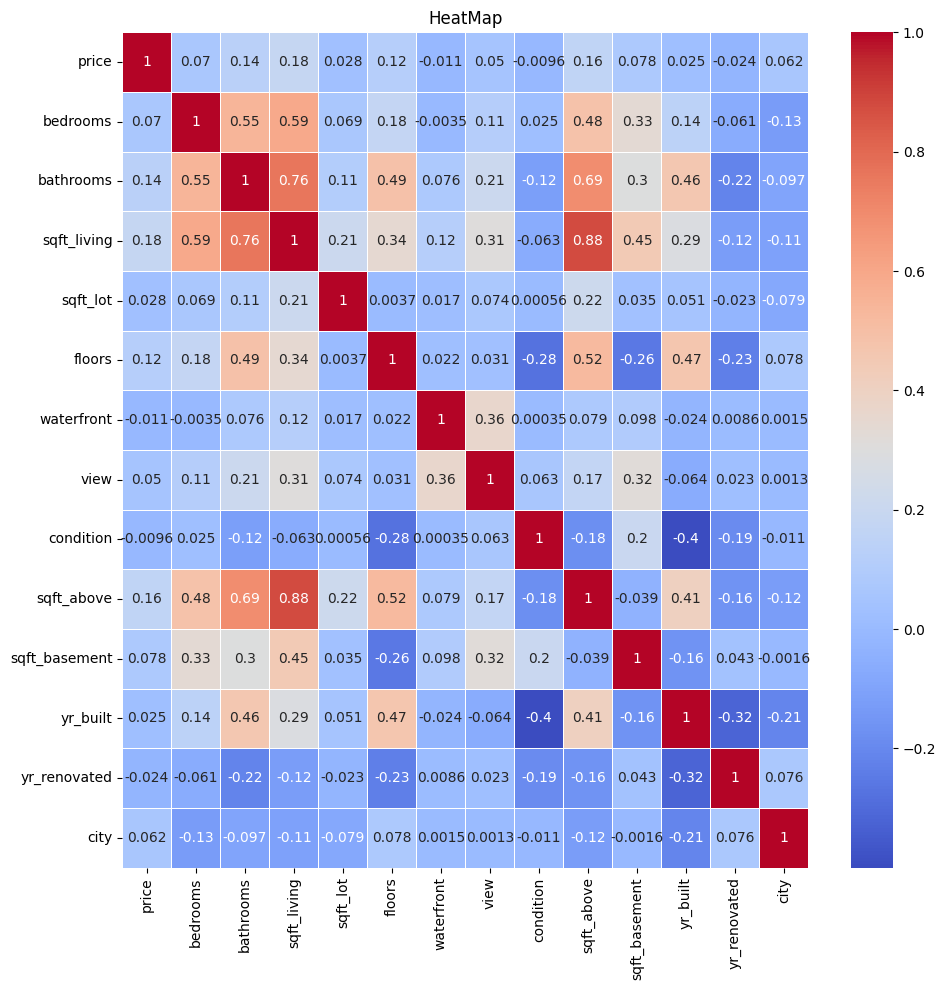

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("HeatMap")
plt.tight_layout()
plt.show()


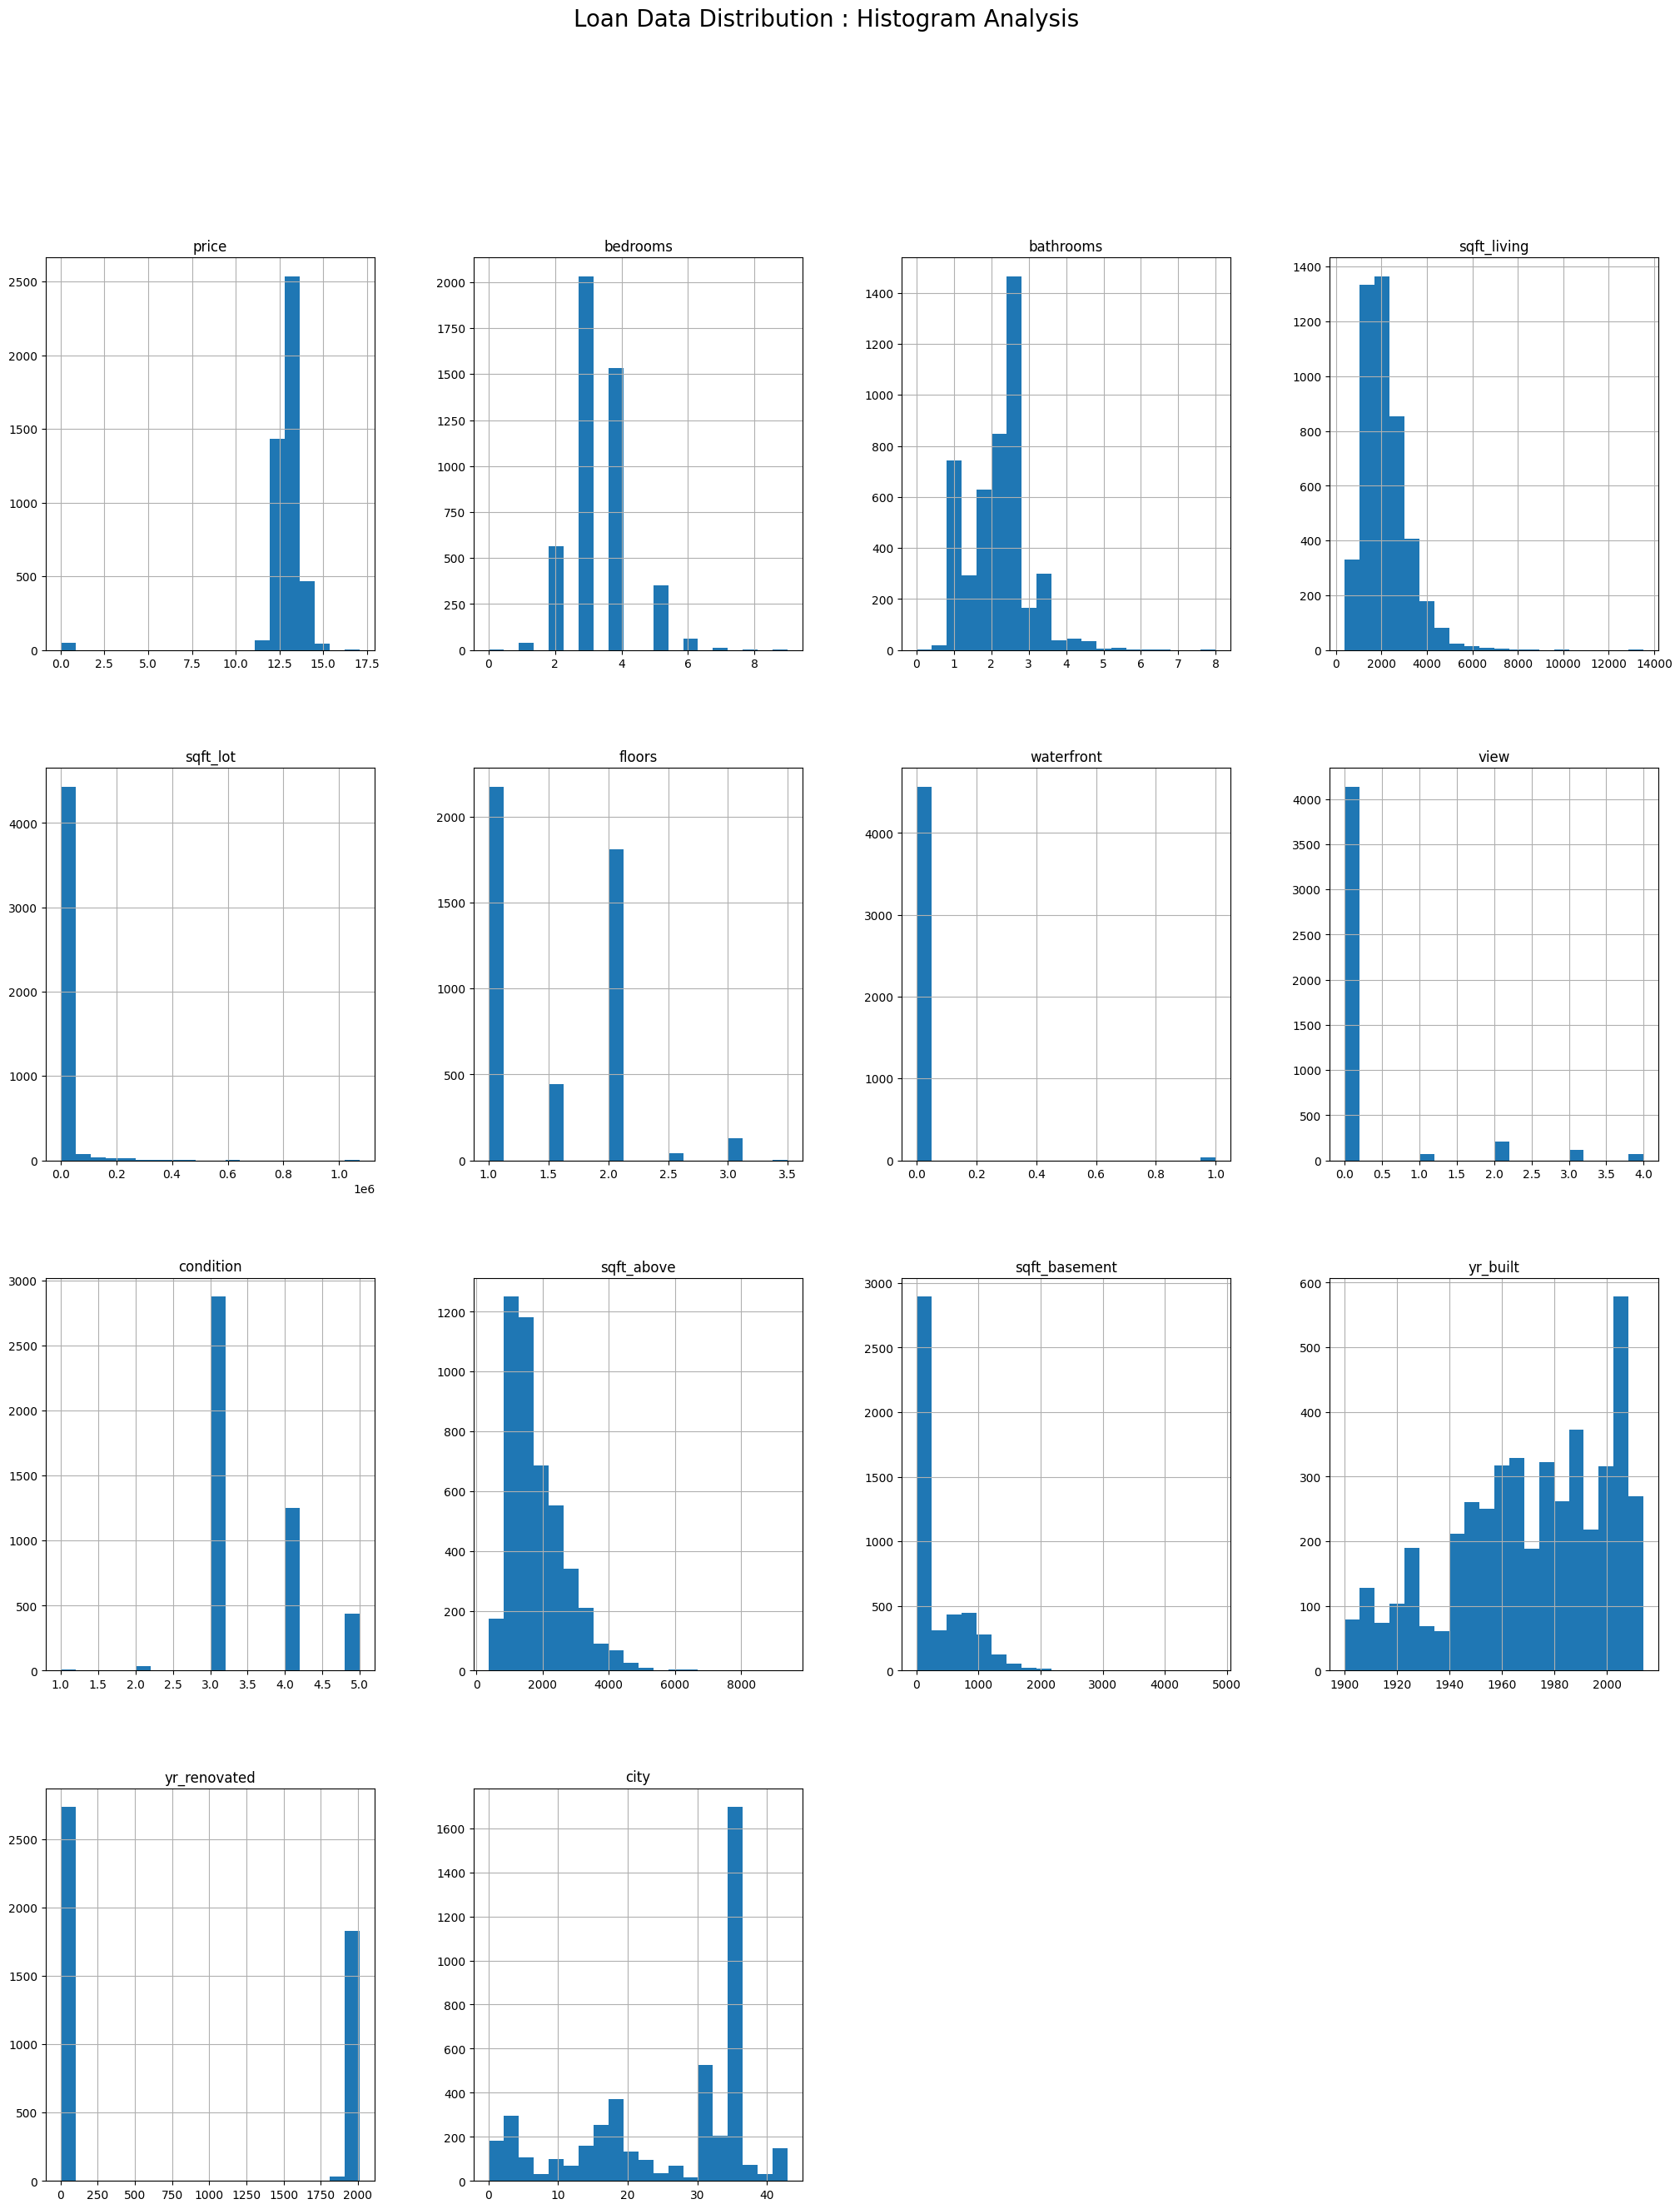

In [46]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("Loan Data Distribution : Histogram Analysis",fontsize=20)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int32  
dtypes: float64(4), int32(1), int64(9)
memory usage: 485.3 KB


In [48]:
loan_df_copy = df.copy()

# Log transformation of skewed columns 
df["sqft_above"] = np.log1p(df["sqft_above"])
df["sqft_basement"] = np.log1p(df["sqft_basement"])
df["sqft_living"] = np.log1p(df["sqft_living"])

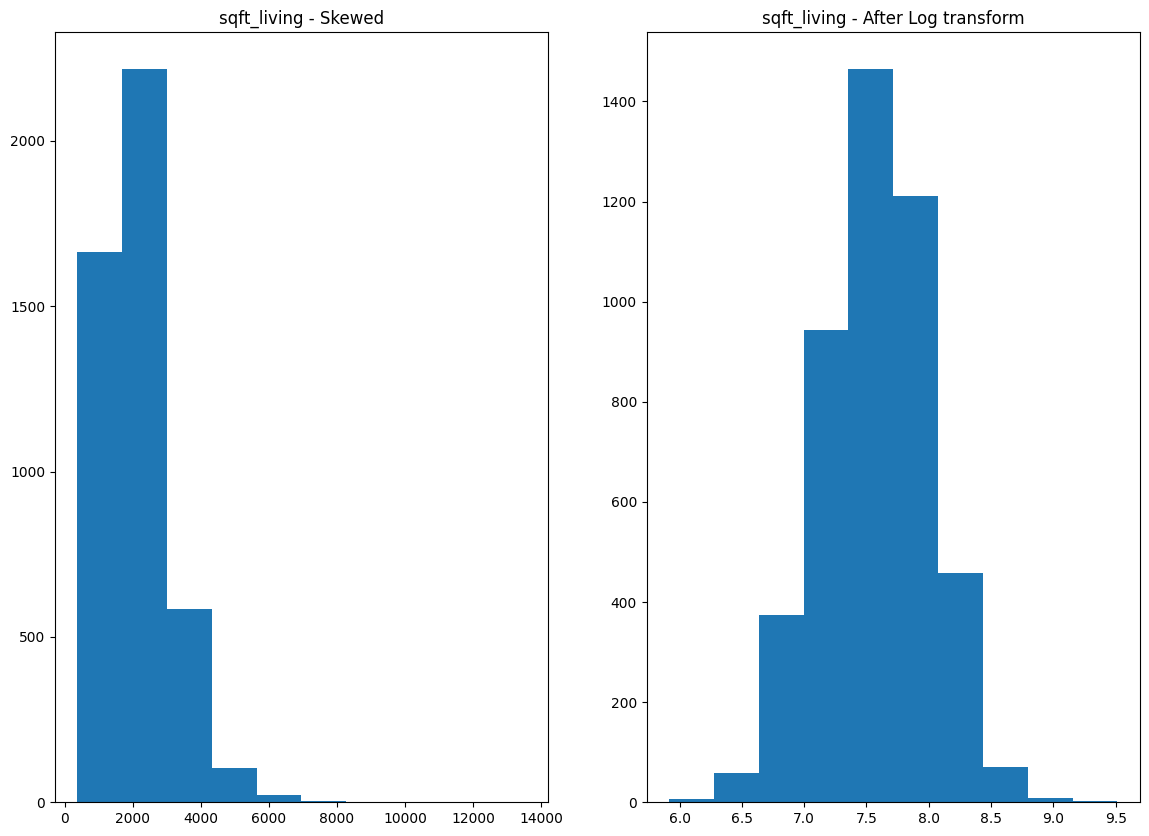

In [49]:
plt.figure(figsize=(14,10))

ax1 = plt.subplot(1,2,1)
cp = plt.hist(loan_df_copy["sqft_living"])
plt.title("sqft_living - Skewed")

ax2 = plt.subplot(1,2,2)
plt.hist(df["sqft_living"])
plt.title("sqft_living - After Log transform")
plt.show()

## Outliers

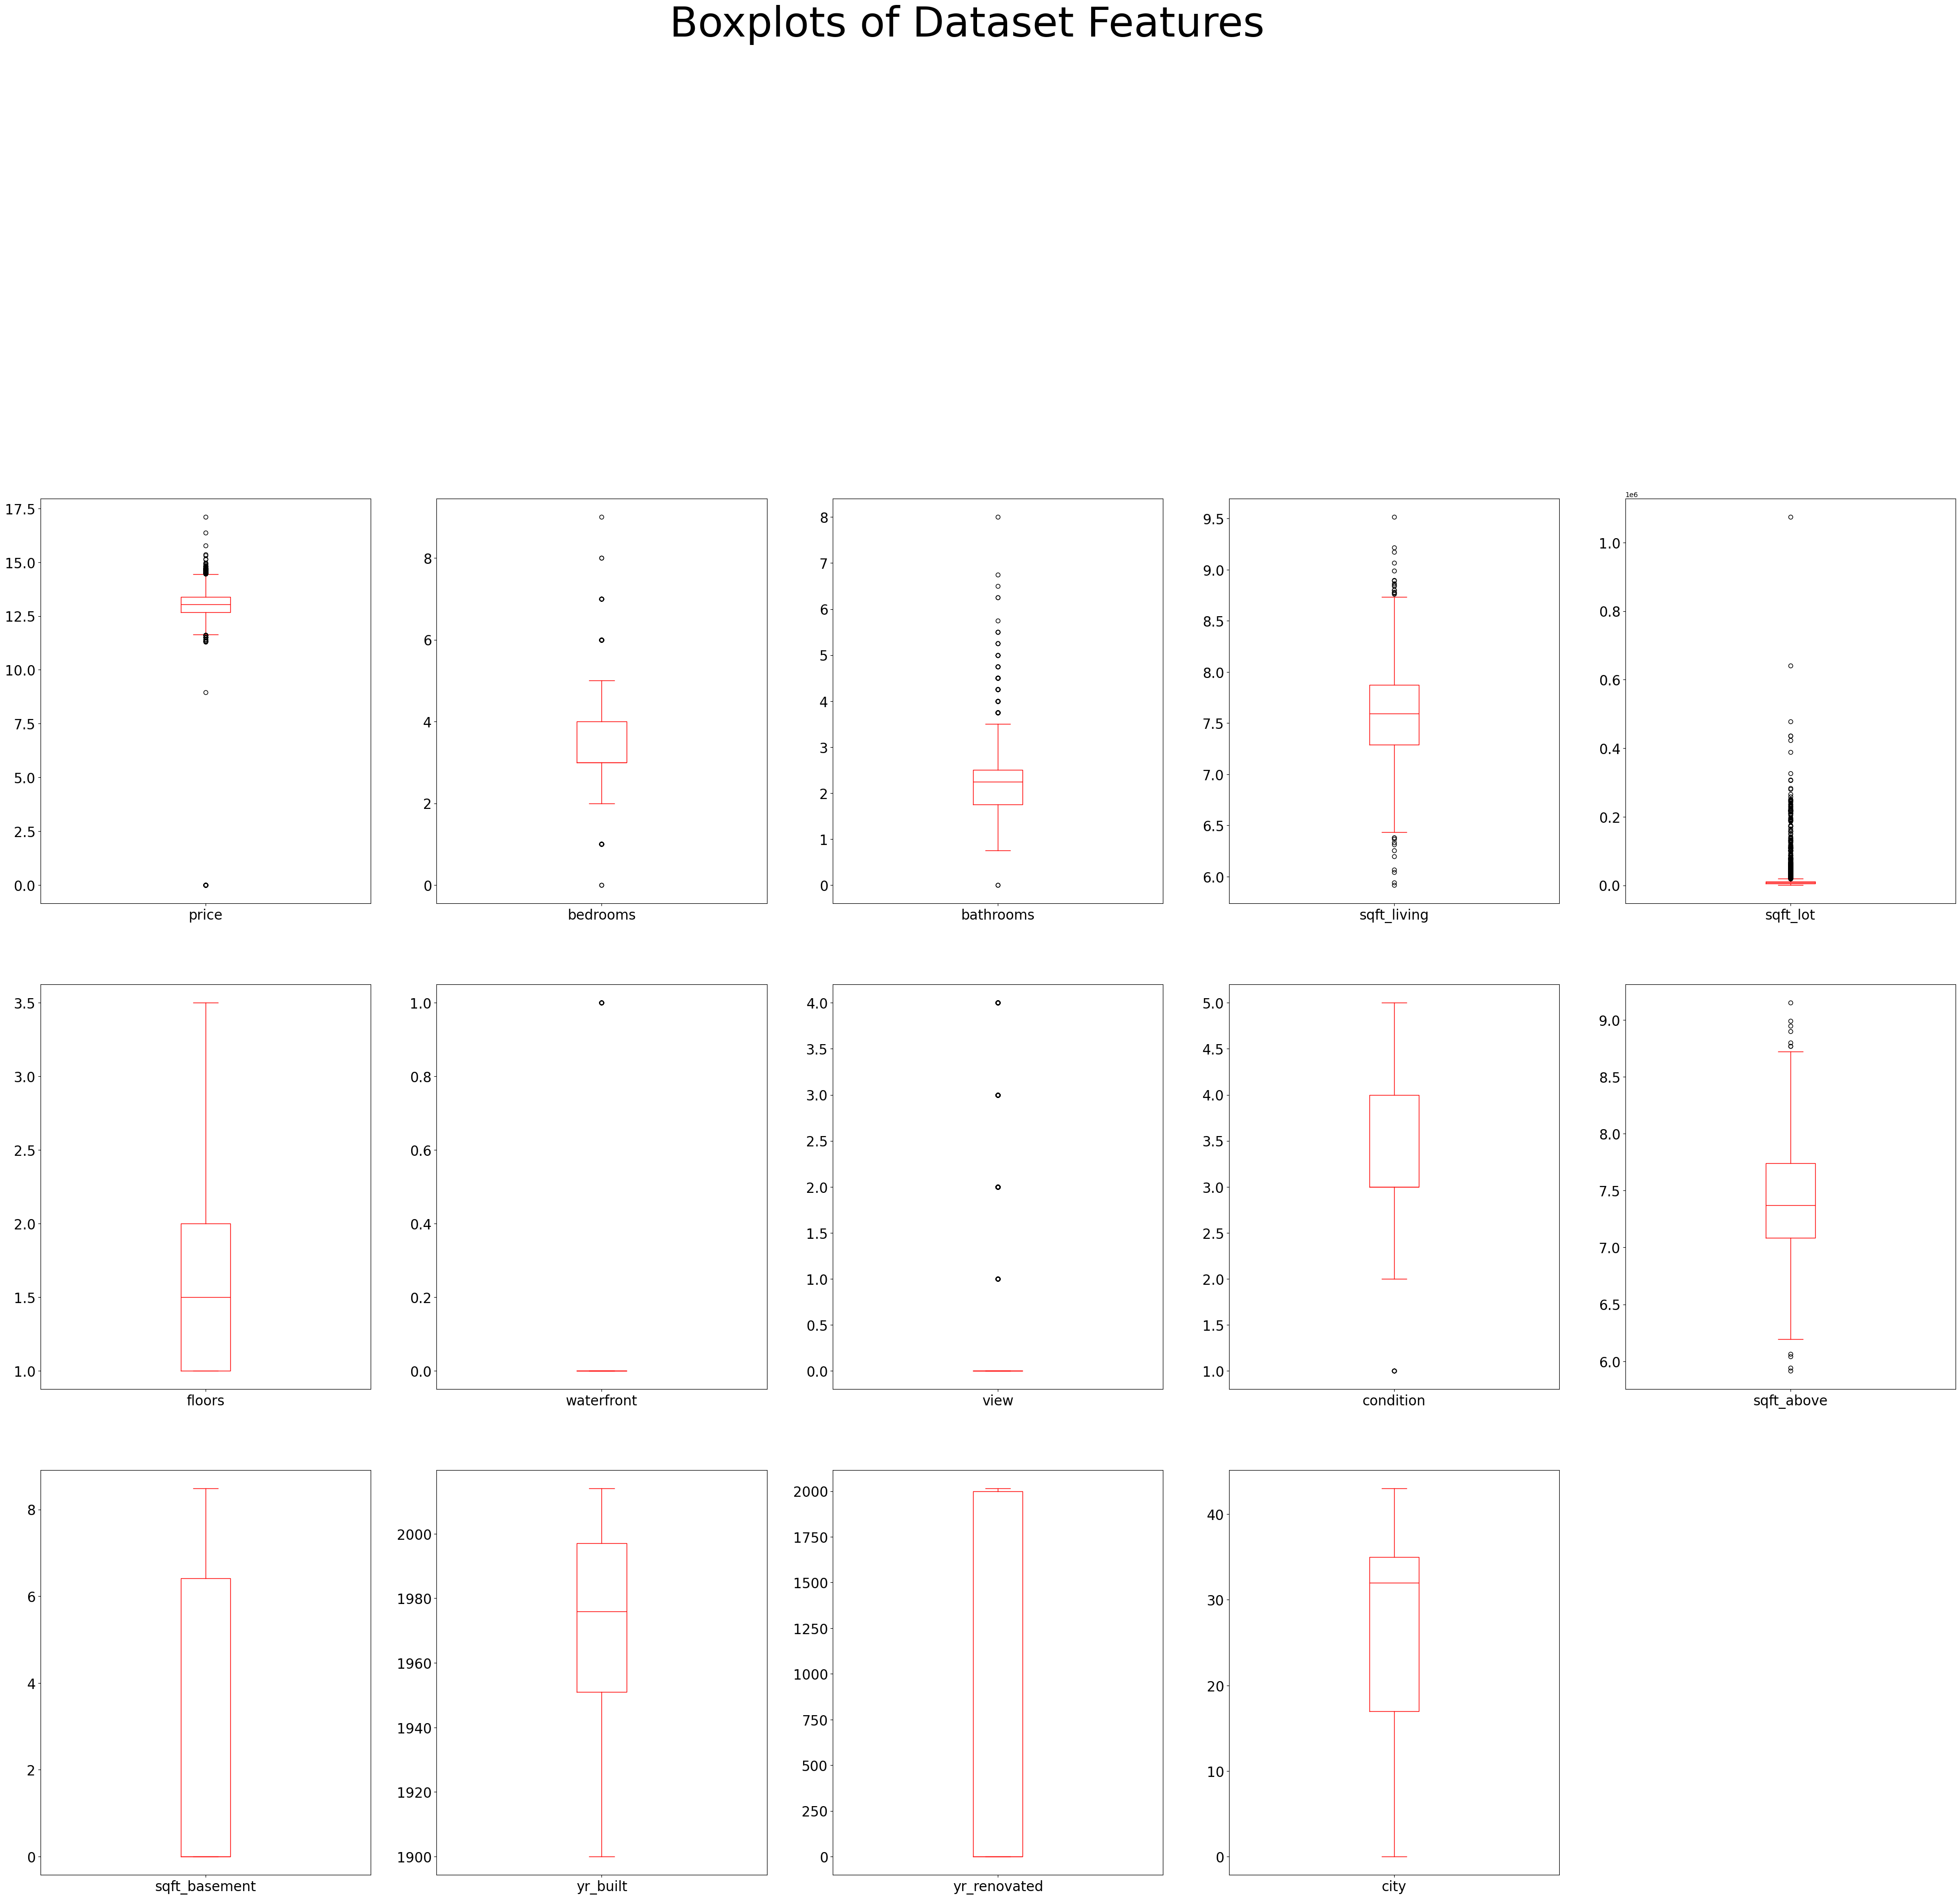

In [50]:
df.plot(kind="box",subplots=True,layout=(8,5),figsize=(50,100),color="red",fontsize=20)
plt.suptitle("Boxplots of Dataset Features", fontsize=60)
plt.show()

## Removing Outliers

In [51]:
# Copy
loan_df_copy = df.copy()

def remove_outliers_iqr(df,exclude_columns):
    for column in df.select_dtypes(include=["number"]):
        if column in exclude_columns:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # Filter out the outliers
        df = df[(df[column] >=lower_bound) & (df[column] <=upper_bound)]
        
    return df

# Define  the columns to exclude
exclude_columns = ["waterfront","condition","yr_built","yr_renovated"]

# Remove Outliers
loan_df = remove_outliers_iqr(df,exclude_columns)

# Print shapes of data before and after removing outliers
print("Shape of data before removing outilers :", loan_df_copy.shape)
print("Shape of data after removing outliers :",loan_df.shape)
print("Number of outliers removed :", loan_df_copy.shape[0]-loan_df.shape[0])

Shape of data before removing outilers : (4600, 14)
Shape of data after removing outliers : (3484, 14)
Number of outliers removed : 1116


## Linear regression 

In [52]:
x=df.drop(columns="price")
y=df["price"]


In [53]:
y

0       12.653962
1       14.684291
2       12.742569
3       12.948012
4       13.217675
          ...    
4595    12.638399
4596    13.188777
4597    12.940614
4598    12.222935
4599    12.304111
Name: price, Length: 4600, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # 20% (0.2) goes to test data

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

y_pred = model.predict(x_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):0.46
Mean Squared Error (MSE):1.90
Root Mean Squaered Error (RMSE):1.38
R2 Score:0.03


## Ridge regression

In [57]:
from sklearn.linear_model import Lasso,Ridge

x=df.drop(columns="price")
y=df["price"]

In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) # 20% (0.2) goes to test data

In [59]:
print("Shape of the Training Features :",x_train.shape)
print("Shape of the Testing Features :",x_test.shape)
print("Shape of the Training Target :",y_train.shape)
print("Shape of the Testing  Target :",y_test.shape)

Shape of the Training Features : (3220, 13)
Shape of the Testing Features : (1380, 13)
Shape of the Training Target : (3220,)
Shape of the Testing  Target : (1380,)


In [60]:
ridge=Ridge(alpha=0.3) 
# Here Alpha is used to give the value ,how many features have to reduce (shrink), depending on important or unimportant
ridge.fit(x_train,y_train)

Ridge(alpha=0.3)

In [61]:
y_pred = ridge.predict(x_test)  # testing data

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):0.47
Mean Squared Error (MSE):1.93
Root Mean Squaered Error (RMSE):1.39
R2 Score:0.04


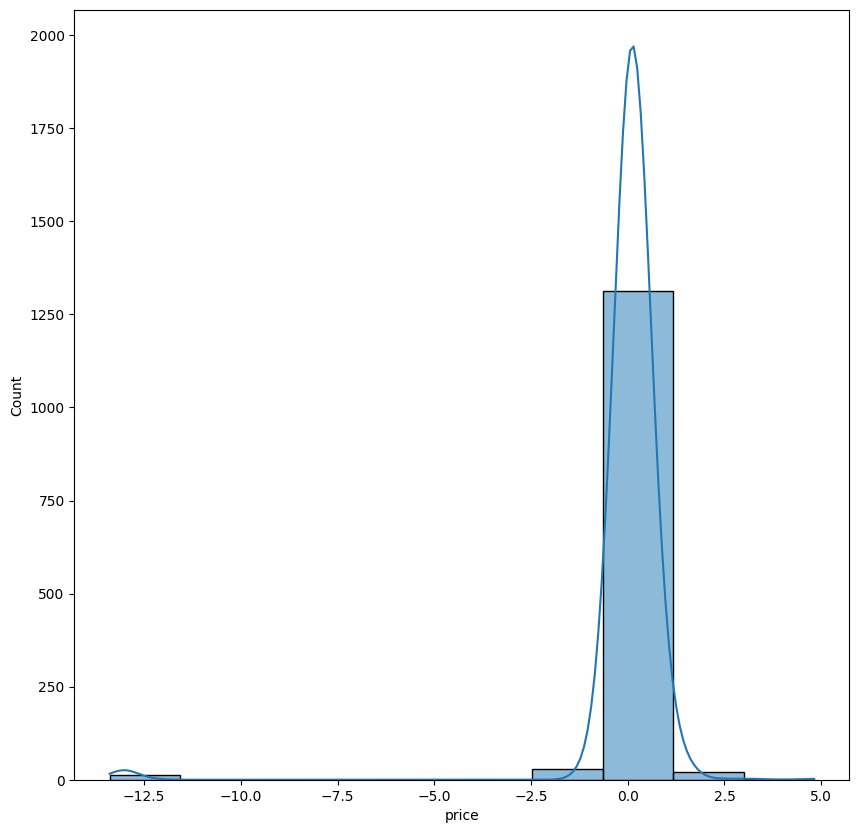

In [63]:
import seaborn as sns

H=y_test-y_pred
plt.figure(figsize=(10,10))
sns.histplot(bins=10,x=H,kde=True)
plt.show()

## Finding the Best Fit Model Algorithm

In [64]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

models = {
    "Linear_Regression" : LinearRegression(),
    "RandomForest_Regressor" : RandomForestRegressor(),
    "GradientBoosting_Regressor" :GradientBoostingRegressor(),
    "DecisionTree_Regressor" : DecisionTreeRegressor(),
    "SVM" : SVR(),
    
    # "MLP_Regressor" : MLPRegressor(max_iter=500),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "ExtraTreesRegressor" : ExtraTreesRegressor(),
    "BaggingRegressor" : BaggingRegressor(),
    "LGBMRegressor" : LGBMRegressor(),
    
    # "CatBoostRegressor" : CatBoostRegressor(),
    "XGBRFRegressor" : XGBRegressor()
}

# Dictionary to store results
results = {"Model" :[],"MSC":[],"MAE" :[],"R2":[]}

# Loop through the models, train them, and calculate the metrics
for model_name , model in models.items():
    # Train the model
    model.fit(x_train,y_train)
    
    # Make predictions
    y1_pred = model.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test,y1_pred)
    mae = mean_absolute_error(y_test,y1_pred)
    r2 = r2_score(y_test,y1_pred)
    
    # Score results in the dictionary
    results["Model"].append(model_name)
    results["MSC"].append(mse)
    results["MAE"].append(mae)
    results["R2"].append(r2)
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Display the results
results_df.style.background_gradient('Reds')



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 3220, number of used features: 13
[LightGBM] [Info] Start training from score 12.923933


,Model,MSC,MAE,R2
0,Linear_Regression,1.928856,0.466473,0.041168
1,RandomForest_Regressor,2.254930,0.510847,-0.120923
2,GradientBoosting_Regressor,2.119052,0.467716,-0.053378
3,DecisionTree_Regressor,4.991009,0.675913,-1.481025
4,SVM,2.027759,0.547793,-0.007997
5,AdaBoostRegressor,2.136020,0.512934,-0.061813
6,ExtraTreesRegressor,2.233847,0.521448,-0.110443
7,BaggingRegressor,2.226382,0.499917,-0.106732
8,LGBMRegressor,2.059389,0.523274,-0.023720
9,XGBRFRegressor,2.385228,0.525703,-0.185694


## Demonstration (Final Report)

The Linear Regression model performed relatively better compared to other models with the lowest MSE (1.93) and highest R² (0.04).